<a href="https://colab.research.google.com/github/lionelrug/Agile-Digital-Project/blob/master/Second_Gold_Price__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries


In [ ]:
1 import numpy as np
2 import pandas as pd
3 import matplotlib.pyplot as plt
4 import seaborn as sns
5 from sklearn.model_selection import train_test_split
6 from sklearn.ensemble import RandomForestRegressor
7 from sklearn import metrics

Data Collection and Processing

In [14]:
import pandas as pd

gold_data = pd.read_csv('/content/gold_price_data.csv')

In [16]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [17]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [18]:
gold_data.shape

(2290, 6)

In [19]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [33]:
correlation = gold_data.corr()

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

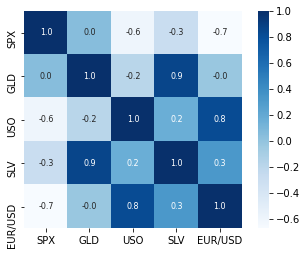

In [38]:
 import seaborn as sns
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws= {'size':8}, cmap='Blues')

In [39]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


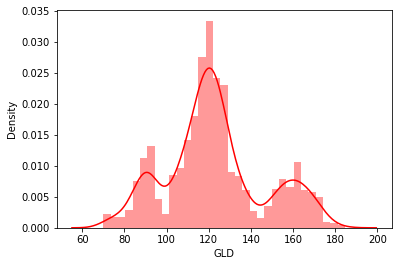

In [40]:
sns.distplot(gold_data['GLD'], color='red')

In [49]:
X = gold_data.drop(['Date' , 'GLD'], axis=1 )
Y = gold_data['GLD']

In [50]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [59]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100)

In [60]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
test_data_prediction = regressor.predict(X_test)

In [63]:
print(test_data_prediction)

[168.42699866  81.85709999 115.95599996 127.48960052 120.89160121
 154.63889689 150.30309719 126.3171002  117.34559889 125.95280116
 116.74160111 172.66770079 142.01569815 167.83689903 115.2539002
 117.85180045 137.38610336 170.03950047 159.64380213 154.204899
 155.14499994 124.96880022 175.35539953 157.00910357 125.18690045
  93.8264995   77.4624     120.51510017 119.04949959 167.50149979
  88.3211003  125.26209997  91.1100007  117.69690005 121.02359944
 136.34740072 115.21040123 115.0790003  146.29109922 107.23040093
 104.5290025   87.30599813 126.59860036 117.91060005 153.44189865
 119.61899982 108.28170002 108.14869871  93.14380052 127.01509813
  74.55220047 113.53489899 121.20610032 111.20069889 118.97079902
 120.84299934 159.34219979 168.18310121 147.08129665  85.77009837
  94.38820047  86.83869881  90.76249999 118.98190077 126.37000043
 127.48270041 169.98650021 122.22099925 117.392999    98.64730051
 168.80990202 143.06419822 132.04280253 121.22380228 121.51729921
 119.52010075

In [71]:
from sklearn import metrics
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared: " ,error_score)

R squared:  0.9886800234691755


In [72]:
Y_test = list(Y_test)

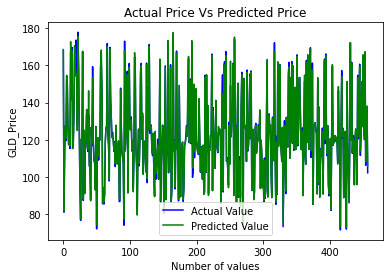

In [76]:
plt.plot(Y_test, color='Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD_Price')
plt.legend()
plt.show()